<br>

# Introduction to Supervised Learning: Numeric Targets
## Generalized Linear Models

## a Brief Recap:

* Hello, how are you?
* Any questions for homework 3?
* Today: Supervised Learning Methods for Numeric Targets
    - Multiple Linear Regression
    - Ridge & Lasso
* Next Week: Supervised Learning Methods for Categorical Targets

## Supervised Regression

Basic Supervised Regression Algorithms:  

* Generalized Linear Models
* Ridge Regression
* Lasso Regression
* Decision Trees
* Random Forests
* k-Nearest Neighbors (kNN)
* Support Vector Machines (SVM)

Today we will focus on extending our understanding of Linear Regression and then move on to Ridge and Lasso Regression.  

Next week we will work on Decision Trees & Random Forest as well as kNN & SVM. However, it will be for the case where the target variable is categorical.

## Building on Simple Linear Regression Models

Last week we considered simple linear regression where: 
$$Y \approx \beta_0 + \beta_1X$$

But the world is complicated!  
It is rare for a single variable to have a strong and consistent linear relationship to a predictor.  

Can you name any simple linear systems? ...

Today we will consider systems where the model describes the relationship of multiple predictor values to a single numeric target variable.  

$$Y \approx \beta_0 + \beta_1X + \beta_2X + \dots + \beta_NX$$

## A Classic Example Dataset

NYC Italian Restaurant DataSet.  

Let's get our environment set up....

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as np
import matplotlib 
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [23]:
path = 'https://raw.githubusercontent.com/SmilodonCub/DS4VS/master/datasets/nyc.csv'
df = pd.read_csv( path, encoding= 'unicode_escape' )
print( df.head(), '\n\n' )
print( df.info() )

   Case           Restaurant  Price  Food  Decor  Service  East
0     1  Daniella Ristorante     43    22     18       20     0
1     2   Tello's Ristorante     32    20     19       19     0
2     3           Biricchino     34    21     13       18     0
3     4              Bottino     41    20     20       17     0
4     5           Da Umberto     54    24     19       21     0 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Case        168 non-null    int64 
 1   Restaurant  168 non-null    object
 2   Price       168 non-null    int64 
 3   Food        168 non-null    int64 
 4   Decor       168 non-null    int64 
 5   Service     168 non-null    int64 
 6   East        168 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 9.3+ KB
None


In [3]:
# note the similar spread of the predictor varaibles
df.describe()

,Case,Price,Food,Decor,Service,East
count,168.000000,168.000000,168.000000,168.000000,168.00000,168.000000
mean,84.500000,42.696429,20.595238,17.690476,19.39881,0.630952
std,48.641546,9.292814,1.982674,2.702743,2.11394,0.483989
min,1.000000,19.000000,16.000000,6.000000,14.00000,0.000000
25%,42.750000,36.000000,19.000000,16.000000,18.00000,0.000000
50%,84.500000,43.000000,20.500000,18.000000,20.00000,1.000000
75%,126.250000,50.000000,22.000000,19.000000,21.00000,1.000000
max,168.000000,65.000000,25.000000,25.000000,24.00000,1.000000


## Our Goal:

* We would like to build an optimal model to predict `Price` from the given feature variables
* We would like to use our model to predict the price of other Italian restaurants

Let's get our data into the environment...

## assessing performance for ML models

Last week we explored a few statistical approaches to modeling data.  
For Machine Learning the goal is slightly different than Statistical Learning:  

**Statistical Learning** - use our model to draw statistical inferences about the system  
**Machine Learning** - emphasizes using the model to predict new cases  

We would like to be able to assess our models ability to predict new observations.  
To do this, we need divide our dataset into 2 sets:  

* **Train** - data that will be used to train our model 
* **Test** - hold-out data to assess model performance. We will keep this data out of use until our model is developed.

## split Train/Test data sets with `sklearn`

* X,y = predictors and Target
* test_size - arbitrary, but typically an 80/20 train/test split
* set a random state so our results are reproducible

In [4]:
#from sklearn.model_selection import train_test_split
X = df.drop(['Price', 'Case', 'Restaurant'], axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

We will only use the test data splits once we are ready to test our model

## Building a Multiple Linear Regression model

* an initial EDA
* we'll start simple, then build to kitchen sink model
* model diagnostics
* model evaluation

### Visualize the features

array([[<AxesSubplot:title={'center':'Food'}>,
        <AxesSubplot:title={'center':'Decor'}>],
       [<AxesSubplot:title={'center':'Service'}>,
        <AxesSubplot:title={'center':'East'}>]], dtype=object)

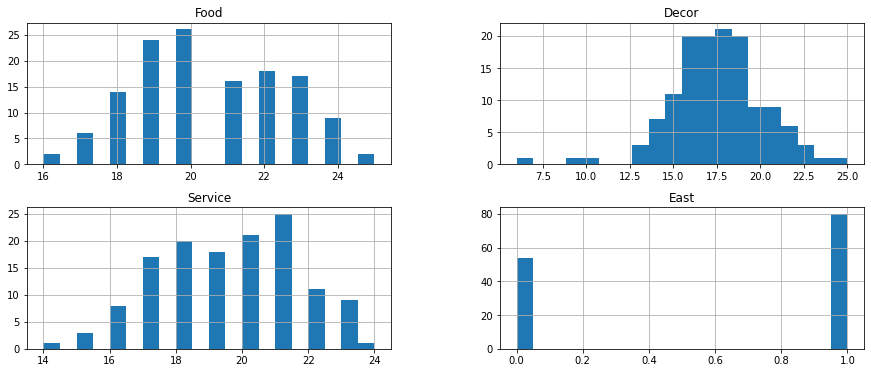

In [5]:
X_train.hist( bins = 20, figsize=(15,6), layout = (2,2) )

## Looking for relationships

Visualize relationships of the predictors

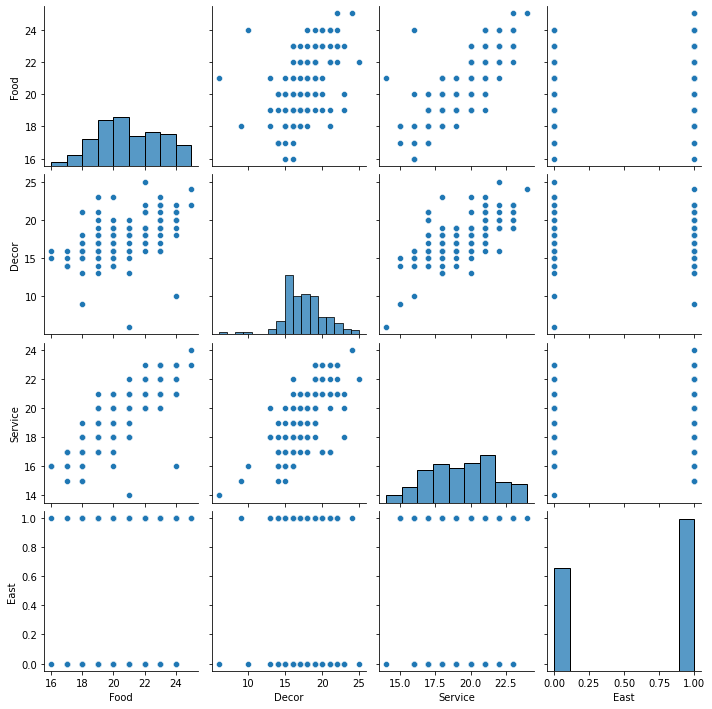

In [6]:
sns.pairplot( X_train )
plt.show()

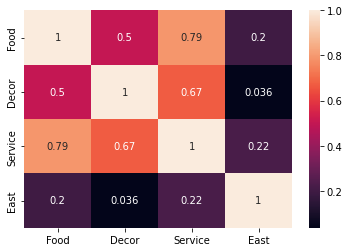

In [7]:
corrMatrix = X_train.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

There are definitely relations between the numeric features (let's ignore 'East' for now).  
A Correlation of 0.5 translates to 25% shared variance.  

We will keep this in mind when we evaluate our model

### using `statsmodels` to build up to a kitchen sink

`statsmodel` is better for a pythonic approach to statistical learning. We will start with this 

But first we'll start with a simple linear regression of the dataset: `Price` modelled by `Food`

In [8]:
train = pd.concat( [X_train, y_train], axis=1 )
simp_mod = smf.ols( formula = 'Price ~ Food', data = train)
fitted_simp = simp_mod.fit()
fitted_simp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     96.72
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           1.85e-17
Time:                        21:35:22   Log-Likelihood:                -454.38
No. Observations:                 134   AIC:                             912.8
Df Residuals:                     132   BIC:                             918.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.9145      6.292     -3.006      0.003     -31.362      -6.467
Food           2.9995      0.305      9.835      0.000       2.396       3.603
==============================================================================
Omnibus:                        6.889   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.032   Jarque-Bera (JB):               11.523
Skew:                          -0.116   Prob(JB):                      0.00315
Kurtosis:                       4.418   Cond. No.                         208.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

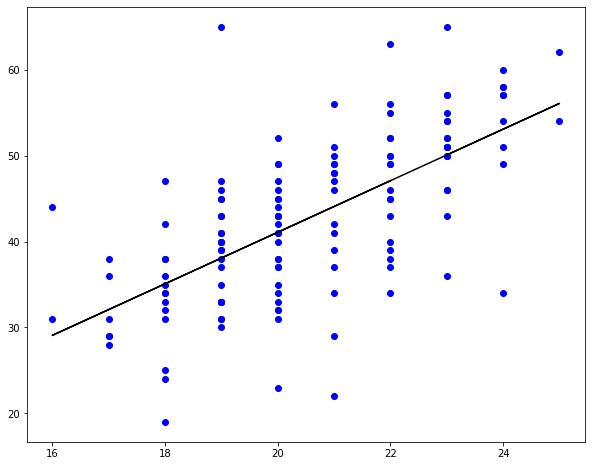

In [9]:
# visualize the fit
fitted_simp.fittedvalues
fig, ax = plt.subplots( figsize = (10,8) )
ax.scatter( x = train['Food'], y = train['Price'], color = 'blue')
ax.plot( train['Food'], fitted_simp.fittedvalues, 'k' )
plt.show()

### Adding the `East` categorical variable

In [10]:
simpE_mod = smf.ols( formula = 'Price ~ Food  + C(East)', data = train)
fitted_simpE = simpE_mod.fit()
fitted_simpE.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     48.58
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           1.65e-16
Time:                        21:35:28   Log-Likelihood:                -454.04
No. Observations:                 134   AIC:                             914.1
Df Residuals:                     131   BIC:                             922.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -18.5169      6.319     -2.930      0.004     -31.017      -6.016
C(East)[T.1]     1.0666      1.302      0.819      0.414      -1.509       3.643
Food             2.9491      0.311      9.467      0.000       2.333       3.565
==============================================================================
Omnibus:                        6.892   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.032   Jarque-Bera (JB):               12.172
Skew:                          -0.029   Prob(JB):                      0.00227
Kurtosis:                       4.475   Cond. No.                         209.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Adding `Decor`

In [11]:
simpD_mod = smf.ols( formula = 'Price ~ Food  + Decor', data = train)
fitted_simpD = simpD_mod.fit()
fitted_simpD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     132.9
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           2.98e-32
Time:                        21:35:32   Log-Likelihood:                -416.96
No. Observations:                 134   AIC:                             839.9
Df Residuals:                     131   BIC:                             848.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -25.9537      4.830     -5.373      0.000     -35.508     -16.399
Food           1.6773      0.267      6.275      0.000       1.148       2.206
Decor          1.9376      0.196      9.900      0.000       1.550       2.325
==============================================================================
Omnibus:                        0.806   Durbin-Watson:                   2.348
Prob(Omnibus):                  0.668   Jarque-Bera (JB):                0.484
Skew:                           0.125   Prob(JB):                        0.785
Kurtosis:                       3.155   Cond. No.                         277.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

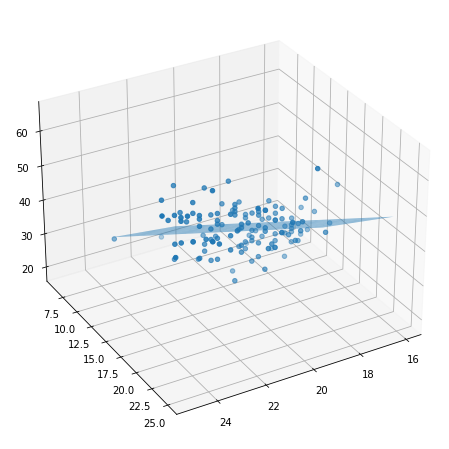

In [12]:
# visualize as a plane in 3D
x = np.linspace(16,25,10)
y = np.linspace(14,24,10)
X,Y = np.meshgrid(x,y)
Z = (-25.9537 + 1.6773*X + 1.9376*Y) 

from mpl_toolkits.mplot3d import axes3d

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter( train['Food'], train['Decor'], train['Price'])
surf = ax.plot_surface(X, Y, Z, alpha=0.5)
ax.view_init(30, 60)

### The Kitchen Sink

That's interesting, let's just see what happens when we include all variables in the model  
What can we conclude from the model coefficients?

In [13]:
# a full 'kitchen sink model'
mlr_mod = smf.ols( formula = 'Price ~ Food + Decor + Service + C(East)', data = train)
fitted_mlr = mlr_mod.fit()
fitted_mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     68.32
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           6.21e-31
Time:                        21:35:39   Log-Likelihood:                -415.01
No. Observations:                 134   AIC:                             840.0
Df Residuals:                     129   BIC:                             854.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -25.8836      4.863     -5.322      0.000     -35.506     -16.261
C(East)[T.1]     1.6747      0.999      1.676      0.096      -0.302       3.651
Food             1.3964      0.376      3.714      0.000       0.653       2.140
Decor            1.8794      0.231      8.147      0.000       1.423       2.336
Service          0.2955      0.432      0.685      0.495      -0.558       1.149
==============================================================================
Omnibus:                        1.177   Durbin-Watson:                   2.292
Prob(Omnibus):                  0.555   Jarque-Bera (JB):                0.824
Skew:                           0.175   Prob(JB):                        0.662
Kurtosis:                       3.158   Cond. No.                         346.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Diagnostic Plots! 

Yep, diagnostic plots are still relevant for multiple linear regression

In [14]:
from statsmodels.nonparametric.smoothers_lowess import lowess
import scipy.stats as stats

def linear_regression(df, x_cols, y_cols):
    mod = sm.OLS(endog=df[y_cols], exog=df[x_cols]).fit()
    influence = mod.get_influence()

    res = df.copy()
    res['resid'] = mod.resid
    res['fittedvalues'] = mod.fittedvalues
    res['resid_std'] = mod.resid_pearson
    res['sqrt_resid_std'] = res['resid_std'].abs().transform('sqrt')
    res['leverage'] = influence.hat_matrix_diag
    res['norm_resid'] = mod.get_influence().resid_studentized_internal
    res['cooks'] = influence.cooks_distance[0]
    res['cooks_pval'] = influence.cooks_distance[1]
    return mod, res


def plot_diagnosis(df):
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (10,8))
    plt.style.use('seaborn')

    # Residual against fitted values.
    smooth = lowess( endog = df.resid, exog =  df.fittedvalues)
    index, data = np.transpose(smooth)
    axs[0,0].scatter( x = df.fittedvalues, y = df.resid, ls = 'None' )
    axs[0,0].plot( index, data, 'r' )
    axs[0,0].axhline( y=0, color='k')
    axs[0,0].set_ylabel( 'Residual' )
    axs[0,0].set_xlabel( 'fitted' )

    # qqplot
    sm.qqplot(
        df['norm_resid'], dist=stats.t, fit=True, line='45',
        ax=axs[0, 1]#, c='#4C72B0'
    )
    axs[0,1].set_title('Normal Q-Q')

    # The scale-location plot.
    smooth = lowess( endog = df.sqrt_resid_std, exog =  df.fittedvalues)
    index, data = np.transpose(smooth)
    axs[1,0].scatter(
        x=df.fittedvalues, y=df.sqrt_resid_std
    )
    axs[1,0].plot( index, data, 'r' )
    axs[1,0].set_xlabel('Fitted values')
    axs[1,0].set_ylabel('Sqrt(|standardized residuals|)')
    axs[1,0].set_title('Scale-Location')

    # Standardized residuals vs. leverage
    smooth = lowess( endog = df.resid_std, exog =  df.leverage)
    index, data = np.transpose(smooth)
    axs[1,1].scatter(
        x=df.leverage, y=df.resid_std#, ax=axes[1, 1]
    )
    axs[1,1].axhline(y=0, color='grey', linestyle='dashed')
    axs[1,1].plot( index, data, 'r' )
    axs[1,1].set_xlabel('Leverage')
    axs[1,1].set_ylabel('standardized residuals')
    axs[1,1].set_title('Residuals vs Leverage')
    leverage_top_3 = np.flip(np.argsort(df.cooks), 0)[:3]
    for i in leverage_top_3:
        axs[1,1].annotate(i, xy=(df.leverage[i],
                                 df.norm_resid[i]));

    plt.tight_layout()
    plt.show()

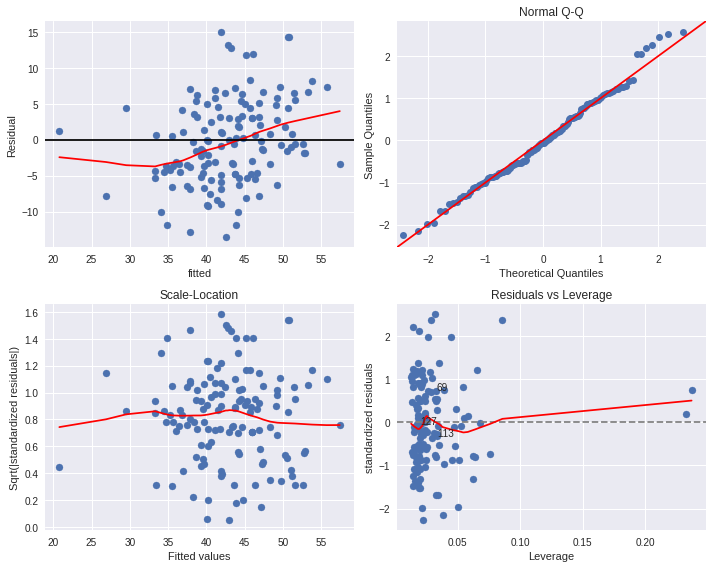

In [20]:
mod_kitchensink, res = linear_regression( df=train, x_cols=['Food', 'Decor', 'Service', 'East'], y_cols=["Price"] )
plot_diagnosis( res )

### Multicolinearity

**Multicolinearity** - we have to consider that the predictors may not only be related to the target variable, but may be related among themselves.  

**Statistical Learning** - multicolinearity does bad things to coefficient estimates (large std errors) and this makes interpretting the model difficult  
**Machine Learning** - it can be shown that multicolinearity will not affect the predictions of the model

Evaluate with the VIF measure: 

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns

vif_data['VIF'] = [variance_inflation_factor( X_train.values,i) for i in range( X_train.shape[1] ) ]
vif_data

,feature,VIF
0,Food,216.440286
1,Decor,76.248957
2,Service,310.812847
3,East,2.658136


### Use the Model to Predict Unseen data

Predict on the X_test predictors evaluate on the y_test known outcomes

In [21]:
fitted_mlr.predict( X_test )

137    33.861961
30     39.107918
119    33.861961
29     48.612750
142    56.147433
161    37.245744
164    37.137769
51     47.216314
105    51.701078
60     53.097514
15     47.028834
156    46.750576
133    52.093235
45     44.666528
68     37.790987
85     36.127566
24     50.600097
109    49.821707
75     42.787156
108    45.041488
19     50.600097
16     47.136810
31     48.021840
18     39.590854
12     46.733379
9      42.679181
82     50.708072
98     33.657284
76     41.095265
55     35.428680
42     42.383726
56     45.767509
148    41.299942
111    36.315046
dtype: float64

## DS4VS Happy Hour  🍷 .....kinda

Here is a toy dataset with several feature variables describing types of wine.  
Try to implement a kitchen sink model with the data to predict the 'quality'

In [28]:
path = '/home/bonzilla/Documents/ScienceLife/DS4VS/datasets/winequality_red.csv'
wine = pd.read_csv( path, encoding= 'unicode_escape' )
print( wine.head(), '\n\n' )
print( wine.info() )

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

<img src="https://raw.githubusercontent.com/SmilodonCub/DS4VS/master/Week10/flowchart.png" width="70%" style="margin-left:auto; margin-right:auto">


## Wonderful!, we just situated linear regression into the broader Linear Regression family. Next we will look at a completely different regression approach...
<img src="https://content.techgig.com/photo/80071467/pros-and-cons-of-python-programming-language-that-every-learner-must-know.jpg?132269" width="100%" style="margin-left:auto; margin-right:auto">